In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences

In [2]:
os.listdir('../input/flickr-image-dataset/flickr30k_images')

['flickr30k_images', 'results.csv']

In [3]:
metadata = pd.read_csv('../input/flickr-image-dataset/flickr30k_images/results.csv',delimiter='|',engine='python')
metadata = metadata.dropna()
is_NaN = metadata.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = metadata[row_has_NaN]
print(rows_with_NaN)
metadata.head()

Empty DataFrame
Columns: [image_name,  comment_number,  comment]
Index: []


,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


### Number of Samples

In [4]:
len(metadata['image_name'].unique())

31783

### Read the Data

In [5]:
def load_image(name):
    img = image.load_img(name,target_size=(32,32,3))
    img = image.img_to_array(img)
    #img = img/255
    #plt.imshow(img)
    img = np.reshape(img,(32*32*3))
    return img

In [6]:
image_arr = []
sentence_arr = []
for ind in range(5000):
    if ind % 5 != 0:
        continue
    image_location = (metadata.iloc[ind,:]['image_name'])
    sentence = (metadata.iloc[ind,:][' comment'])
    
    
    image_arr.append(load_image('../input/flickr-image-dataset/flickr30k_images/flickr30k_images/'+str(image_location)) )
    sentence_arr.append('<SOS>'+sentence+'<EOS>')
    
        
Images =  np.array(image_arr)

# Preprocess
Converting to Word Embeddings
create padding and make equal length
Vocabulary
The complexity of the problem is determined by the complexity of the vocabulary. A more complex vocabulary is a more complex problem. Let's look at the complexity of the dataset we'll be working with.

## Tokenize (IMPLEMENTATION)
For a neural network to predict on text data, it first has to be turned into data it can understand. Text data like "dog" is a sequence of ASCII character encodings. Since a neural network is a series of multiplication and addition operations, the input data needs to be number(s).

We can turn each character into a number or each word into a number. These are called character and word ids, respectively. Character ids are used for character level models that generate text predictions for each character. A word level model uses word ids that generate text predictions for each word. Word level models tend to learn better, since they are lower in complexity, so we'll use those.

Turn each sentence into a sequence of words ids using Keras's Tokenizer function. Use this function to tokenize english_sentences and french_sentences in the cell below.

Running the cell will run tokenize on sample data and show output for debugging.

In [7]:
def tokenize(x):
    """
    Tokenize x
    :param x: List of sentences/strings to be tokenized
    :return: Tuple of (tokenized x data, tokenizer used to tokenize x)
    """
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(x)
    t=tokenizer.texts_to_sequences(x)
    # TODO: Implement
    return t, tokenizer

# Tokenize Example output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']
text_tokenized, text_tokenizer = tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

{'the': 1, 'quick': 2, 'a': 3, 'brown': 4, 'fox': 5, 'jumps': 6, 'over': 7, 'lazy': 8, 'dog': 9, 'by': 10, 'jove': 11, 'my': 12, 'study': 13, 'of': 14, 'lexicography': 15, 'won': 16, 'prize': 17, 'this': 18, 'is': 19, 'short': 20, 'sentence': 21}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [1, 2, 4, 5, 6, 7, 1, 8, 9]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [10, 11, 12, 2, 13, 14, 15, 16, 3, 17]
Sequence 3 in x
  Input:  This is a short sentence .
  Output: [18, 19, 3, 20, 21]


## Padding (IMPLEMENTATION)
When batching the sequence of word ids together, each sequence needs to be the same length. Since sentences are dynamic in length, we can add padding to the end of the sequences to make them the same length.

Make sure all the English sequences have the same length and all the French sequences have the same length by adding padding to the end of each sequence using Keras's pad_sequences function.

In [8]:
def pad(x, length=None):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    """
    # TODO: Implement
    padding=pad_sequences(x,padding='post',maxlen=length)
    return padding

# Pad Tokenized output
test_pad = pad(text_tokenized)
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))

Sequence 1 in x
  Input:  [1 2 4 5 6 7 1 8 9]
  Output: [1 2 4 5 6 7 1 8 9 0]
Sequence 2 in x
  Input:  [10 11 12  2 13 14 15 16  3 17]
  Output: [10 11 12  2 13 14 15 16  3 17]
Sequence 3 in x
  Input:  [18 19  3 20 21]
  Output: [18 19  3 20 21  0  0  0  0  0]


In [9]:
def preprocess(sentences):
    text_tokenized, text_tokenizer = tokenize(sentences)
    text_pad = pad(text_tokenized)
    return text_pad, text_tokenizer

Sentence , token_Sentence = preprocess(sentence_arr)

In [10]:
print("Sentence vocabulary size:", len(token_Sentence.word_index))
print("Sentence Longest sentence size:", len(Sentence[0]))

Sentence vocabulary size: 2302
Sentence Longest sentence size: 51


In [11]:
Images.shape , Sentence.shape

((1000, 3072), (1000, 51))

In [12]:
Sentence

array([[  2,  17,  21, ...,   0,   0,   0],
       [  2, 105,  37, ...,   0,   0,   0],
       [  2,   1,  49, ...,   0,   0,   0],
       ...,
       [  2,   1, 296, ...,   0,   0,   0],
       [  2,   1,  21, ...,   0,   0,   0],
       [  2,   1,  15, ...,   0,   0,   0]], dtype=int32)

### Load and batch data
This tutorial uses torchtext to generate Wikitext-2 dataset. The vocab object is built based on the train dataset and is used to numericalize tokens into tensors. Starting from sequential data, the batchify() function arranges the dataset into columns, trimming off any tokens remaining after the data has been divided into batches of size batch_size. For instance, with the alphabet as the sequence (total length of 26) and a batch size of 4, we would divide the alphabet into 4 sequences of length 6:


 
 
 
These columns are treated as independent by the model, which means that the dependence of G and F can not be learned, but allows more efficient batch processing.

In [13]:
def create_batch(src, tar , batchsize , i):
    src, tar =  np.transpose(src[(i-1)*batchsize : (i-1)*batchsize + batchsize]) , np.transpose(tar[(i-1)*batchsize : (i-1)*batchsize + batchsize])
    return torch.tensor(src).long(),torch.tensor(tar).long()

# Modeling Transformer

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
class Transformer(nn.Module):
    def __init__(
        self,
        embedding_size,
        src_vocab_size,
        trg_vocab_size,
        src_pad_idx,
        num_heads,
        num_encoder_layers,
        num_decoder_layers,
        forward_expansion,
        dropout,
        max_len_s,
        max_len_t,
        device,
    ):
        super(Transformer, self).__init__()
        self.src_word_embedding = nn.Embedding(src_vocab_size, embedding_size)
        self.src_position_embedding = nn.Embedding(max_len_s, embedding_size)
        self.trg_word_embedding = nn.Embedding(trg_vocab_size, embedding_size)
        self.trg_position_embedding = nn.Embedding(max_len_t, embedding_size)

        self.device = device
        self.transformer = nn.Transformer(
            embedding_size,
            num_heads,
            num_encoder_layers,
            num_decoder_layers,
            forward_expansion,
            dropout,
        )
        self.fc_out = nn.Linear(embedding_size, trg_vocab_size)
        self.dropout = nn.Dropout(dropout)
        self.src_pad_idx = src_pad_idx

    def make_src_mask(self, src):
        src_mask = src.transpose(0, 1) == self.src_pad_idx

        # (N, src_len)
        return src_mask.to(self.device)

    def forward(self, src, trg):
        src_seq_length, N = src.shape
        trg_seq_length, N = trg.shape

        src_positions = (
            torch.arange(0, src_seq_length)
            .unsqueeze(1)
            .expand(src_seq_length, N)
            .to(self.device)
        )

        trg_positions = (
            torch.arange(0, trg_seq_length)
            .unsqueeze(1)
            .expand(trg_seq_length, N)
            .to(self.device)
        )

        embed_src = self.dropout(
            (self.src_word_embedding(src) + self.src_position_embedding(src_positions))
        )
        embed_trg = self.dropout(
            (self.trg_word_embedding(trg) + self.trg_position_embedding(trg_positions))
        )

        src_padding_mask = self.make_src_mask(src)
        trg_mask = self.transformer.generate_square_subsequent_mask(trg_seq_length).to(self.device)
        out = self.transformer(
            embed_src,
            embed_trg,
            src_key_padding_mask=src_padding_mask,
            tgt_mask=trg_mask,
        )
        out = self.fc_out(out)
        return out

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [16]:
# Model hyperparameters
src_vocab_size = 256
trg_vocab_size = len(token_Sentence.word_index)
embedding_size = 512
num_heads = 8
num_encoder_layers = 3
num_decoder_layers = 3
dropout = 0.10
max_len_s = Images.shape[1]
max_len_t = len(Sentence[0])
forward_expansion = 4
src_pad_idx = 0


In [17]:
# Training hyperparameters
num_epochs = 10000
learning_rate = 3e-4
batch_size = 1

In [18]:
model = Transformer(
    embedding_size,
    src_vocab_size,
    trg_vocab_size,
    src_pad_idx,
    num_heads,
    num_encoder_layers,
    num_decoder_layers,
    forward_expansion,
    dropout,
    max_len_s,
    max_len_t,
    device,
).to(device)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.1, patience=10, verbose=True
)

pad_idx = 0
criterion = nn.CrossEntropyLoss(ignore_index=pad_idx).cuda()


In [19]:
import time
import tqdm
def train():
    model.train() # Turn on the train mode
    total_loss = 0
    start_time = time.time()
    for i in tqdm.tqdm(range(1, 999)):
        src,tar = create_batch(Images,Sentence, batch_size , i)
        src = src.to(device)
        tar = tar.to(device)
        optimizer.zero_grad()
        output = model(src,tar)
        loss = criterion(output.view(-1, output.shape[2]), tar.reshape(-1))
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()
        cur_loss = loss.item()
        total_loss += cur_loss
        log_interval = 100
        if i % log_interval == 0 and i > 0:
            elapsed = time.time() - start_time
            '''print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  's/batch {:5.2f} | '
                  'loss {:5.2f} | ppl {:8.2f}'.format(
                    epoch, i, (src.shape[1]) // batch_size, 
                    elapsed  / log_interval,
                    cur_loss, math.exp(cur_loss)))'''
            start_time = time.time()
    return total_loss

In [20]:

import math
for epoch in range(1, 3):
    epoch_start_time = time.time()
    loss = train()
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | Training loss {:5.2f} | '
          .format(epoch, (time.time() - epoch_start_time),
                                     loss))

  0%|          | 1/998 [00:00<03:04,  5.40it/s]

-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 184.05s | Training loss 2525.47 | 


100%|██████████| 998/998 [03:05<00:00,  5.38it/s]

-----------------------------------------------------------------------------------------
| end of epoch   2 | time: 185.55s | Training loss 731.06 | 


In [21]:
torch.save(model.state_dict(), 'my_model.pth')

# Evaluate
The following steps are used for evaluation:

1. Encode english sentence
2. Add tokens of start and end
3. Decoder input is start token SOS
4. Get the padded version of enoded sentences
5. create mask
Till get eos token calculate or create sentence

In [22]:
model.load_state_dict(torch.load('my_model.pth'))

<All keys matched successfully>

In [23]:
def display_image(name):
    img = image.load_img(name,target_size=(512,512,3))
    img = image.img_to_array(img)
    img = img/255
    plt.imshow(img)

In [24]:
def evaluate(index):
    image_location, sent = metadata.iloc[index,0],metadata.iloc[index,2]
    image_arr = []
    img = load_image('../input/flickr-image-dataset/flickr30k_images/flickr30k_images/'+str(image_location))
    image_arr.append(img)
    img_arr = np.array(image_arr)
    sentence = []
    sentence.append(sent)
    sentence[0] = '<SOS> '+sentence[0]+'<EOS>'
    sentence = pad(token_Sentence.texts_to_sequences(sentence) , length = max_len_t)
    src , tar = create_batch(img_arr,sentence, 1,1)
    src = src.to(device)
    tar = tar.to(device)
    model.eval()
    output =  model(src,tar)
    loss = criterion(output.view(-1, output.shape[2]), tar.reshape(-1))
    sentence_formed = ''
    val, ind = torch.max(output.view(-1, output.shape[2]), 1)
    for word in ind:
        #print('--->'+sentence_formed+'    '+str(word.item()))
        if word.item() == 3: # EOS
                break
        for key, value in token_Sentence.word_index.items():
            #print(value == word.item())
            if value == word.item() and value != 2: # sos
                sentence_formed = sentence_formed + key +' '
                break
    display_image('../input/flickr-image-dataset/flickr30k_images/flickr30k_images/'+str(image_location))
    return sentence_formed , loss

('two young guys with shaggy hair look at their hands while hanging out in the yard ',
 tensor(0.0590, device='cuda:0', grad_fn=<NllLossBackward>))

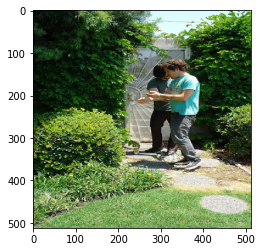

In [25]:
evaluate(0)

('a child in a pink dress is climbing up a set of stairs in an entry way ',
 tensor(0.0475, device='cuda:0', grad_fn=<NllLossBackward>))

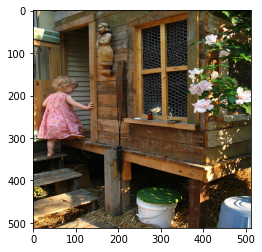

In [26]:
evaluate(10)

('two large dogs railroad each other at the beach ',
 tensor(0.4551, device='cuda:0', grad_fn=<NllLossBackward>))

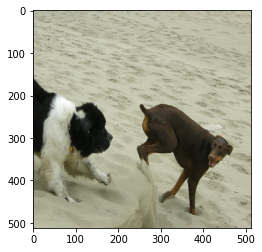

In [27]:
evaluate(1001)

('an asian man wearing a black suit stands near a dark haired woman and a brown haired woman ',
 tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>))

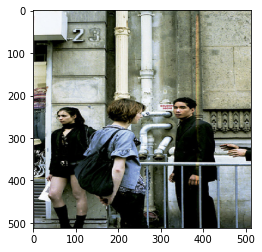

In [28]:
evaluate(40)